<h1>라플라시안 필터</h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-11-라플라시안_필터.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-11-라플라시안_필터.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

시작전에 sdk.png를 코랩 환경의 '/content/sample_data'에 업로드해준다.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0    696      0 --:--:-- --:--:-- --:--:--   696
100 70654  100 70654    0     0   138k      0 --:--:-- --:--:-- --:--:--  884k


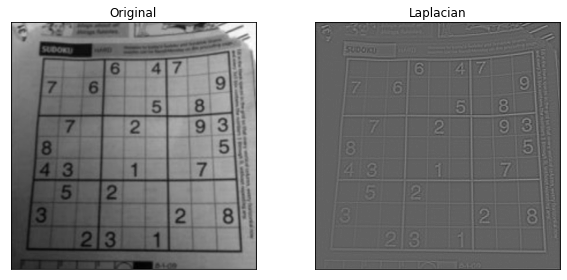

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 읽기
!curl -L https://github.com/swkim01/DSAC5/raw/main/data/sdk.png -o sdk.png
img = cv2.imread('./sdk.png',0)
#img = cv2.imread('/content/sample_data/sdk.png',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()